# Reading and Preprocessing

### Reading the data files

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# load the data
data_dir = os.getcwd() + '\\data\\'

# reading CO2 data
raw_co2 = pd.read_csv(data_dir + 'CO2 Level.csv')

# reading motion data
raw_mot = pd.read_csv(data_dir + 'Motion Data.csv')

# reading distance data
raw_dist = pd.read_csv(data_dir + 'Distance Sensor.csv')

## Basic Analytics and Preprocessing

### CO2 Level Data

In [2]:
raw_co2.describe()

,value
count,11446.000000
mean,770.676393
std,288.684136
min,372.000000
25%,521.000000
50%,671.500000
75%,952.000000
max,1410.000000


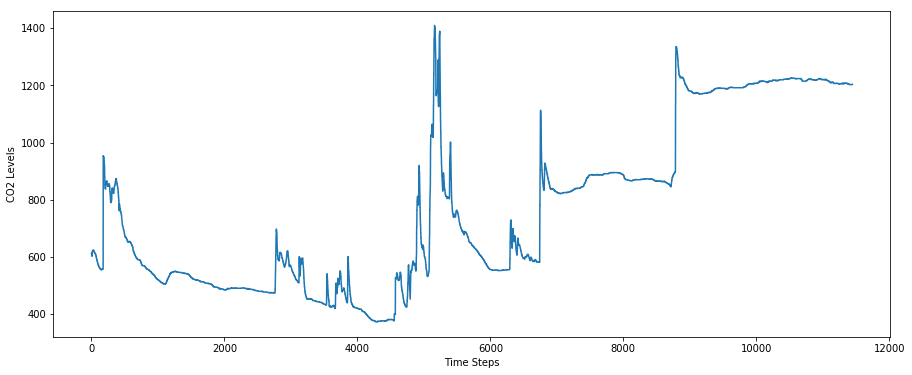

In [3]:
plt.figure(figsize=(15,6))
plt.plot(raw_co2.value)
plt.xlabel('Time Steps')
plt.ylabel('CO2 Levels')
plt.show()

### Missing Data of CO2 Levels
We have 11,448 observation in Distance and Motion dataset, but in CO2 Level Sensor's data we have 11,446 obeservations. Therefore, we have 2 missing data. Assuming the missing data are located at the end of dataset and considering the constant values at the above chart (approximately constant at the end), we add 2 more observations to the data.  

In [4]:
# adding 2 rows to CO2 Level observation 
missing_time = raw_co2.loc[11445][0]
missing_value = raw_co2.loc[11445][1]
raw_co2.loc[11446] = [missing_time, missing_value]
raw_co2.loc[11447] = [missing_time, missing_value]
raw_co2[-3:]

,Time,value
11445,16:25,1204
11446,16:25,1204
11447,16:25,1204


### Motion Data

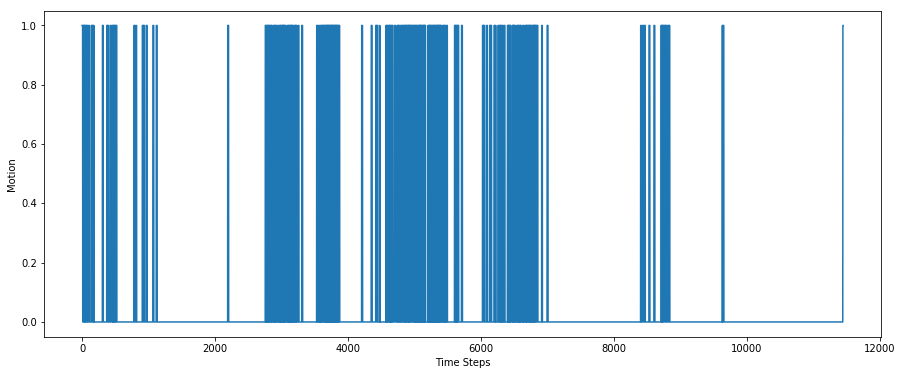

In [5]:
plt.figure(figsize=(15,6))
plt.plot(raw_mot.value)
plt.xlabel('Time Steps')
plt.ylabel('Motion')
plt.show()

In [6]:
raw_mot.value.unique()

array([1, 0], dtype=int64)

Regarding to the values of the Motion Sensor's dataset, the data is binary pulses in each time step which represent if the sensor detects any motion or not. 

### Distance Data

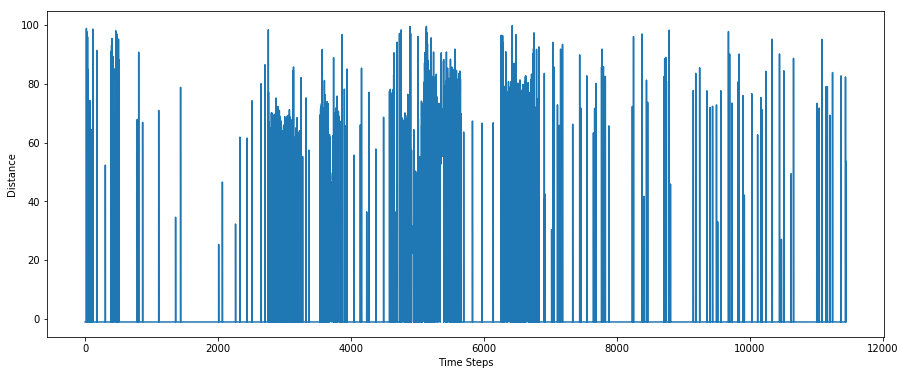

In [6]:
plt.figure(figsize=(15,6))
plt.plot(raw_dist.value)
plt.xlabel('Time Steps')
plt.ylabel('Distance')
plt.show()

## Getting all together
For ease of use, we combine and save the data to be used in the next steps. 

In [7]:
df = pd.DataFrame(columns = ['time', 'co2', 'motion', 'distance'])
df.time = raw_co2.Time
df.co2 = raw_co2.value
df.motion = raw_mot.value
df.distance = raw_dist.value
df.to_csv(data_dir + '1.csv', index = False)